# Stack Overflow Survey Analysis 2020

The Stack Overflow community website is a major resource for programmers worldwide looking for answers to tough questions. As a result, Stack Exchange Inc has taken a yearly developer survey through channels like onsite messages, ads and e-mail lists, they publish the results.

## 1. Business Understanding

Stack Overflow Survey results will be explored in order to glean infromation on professional developers and what to focus on to have the best career.

#### Questions 

1. What are the most used Languages, platform, database, framework worked with, most often used programming language and most important job factors?

2. Does company size influence the job statisfaction of developers?

3. Does the age influence which programming languages they know or want to learn?

## 2. Data Understanding

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv("survey_results_public.csv")
schema=pd.read_csv('survey_results_schema.csv')

In [22]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [23]:
df.shape

(64461, 61)

In [24]:
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [25]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

In [27]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [28]:
#duplicate values
df.duplicated().sum()

0

In [29]:
df.MainBranch.value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [30]:
df.Employment.value_counts()

Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64

In [31]:
df.JobSat.value_counts()

Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

In [32]:
df.OrgSize.value_counts()

20 to 99 employees                                    9597
100 to 499 employees                                  8311
10,000 or more employees                              6149
1,000 to 4,999 employees                              4863
2 to 9 employees                                      4409
10 to 19 employees                                    4127
500 to 999 employees                                  2880
Just me - I am a freelancer, sole proprietor, etc.    2190
5,000 to 9,999 employees                              1808
Name: OrgSize, dtype: int64

In [33]:
df.Gender.value_counts()

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

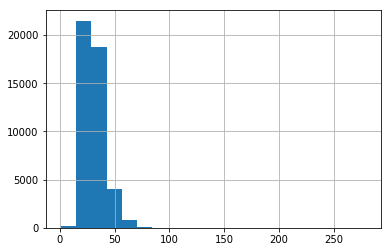

In [34]:
df.Age.hist(bins = 20);

In [35]:
df.Age.value_counts()

25.0     2693
28.0     2412
30.0     2406
26.0     2391
27.0     2338
24.0     2275
29.0     2219
23.0     2213
22.0     1884
32.0     1781
31.0     1716
21.0     1628
33.0     1527
35.0     1485
34.0     1374
20.0     1204
36.0     1129
38.0     1094
37.0     1057
40.0      914
39.0      858
19.0      816
18.0      644
42.0      626
41.0      591
43.0      520
45.0      472
17.0      422
44.0      397
46.0      348
         ... 
3.0         1
14.5        1
5.0         1
19.8        1
22.5        1
15.5        1
88.0        1
96.0        1
279.0       1
34.5        1
97.0        1
35.7        1
14.7        1
7.0         1
39.5        1
32.5        1
84.0        1
86.0        1
26.8        1
26.5        1
23.4        1
98.0        1
32.8        1
21.5        1
49.5        1
23.8        1
95.0        1
31.5        1
20.5        1
16.5        1
Name: Age, Length: 110, dtype: int64

In [36]:
df.Country.value_counts()

United States                         12469
India                                  8403
United Kingdom                         3896
Germany                                3890
Canada                                 2191
France                                 1898
Brazil                                 1818
Netherlands                            1343
Poland                                 1278
Australia                              1208
Spain                                  1161
Italy                                  1117
Russian Federation                     1092
Sweden                                  886
Pakistan                                809
Turkey                                  777
Israel                                  653
Switzerland                             629
Bangladesh                              609
Romania                                 604
Nigeria                                 593
Mexico                                  540
Ukraine                         

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

In [38]:
df.Age = df.Age.round()
df.Age.value_counts()

25.0     2693
28.0     2414
30.0     2406
26.0     2392
27.0     2339
24.0     2278
29.0     2219
23.0     2214
22.0     1886
32.0     1783
31.0     1716
21.0     1628
33.0     1528
35.0     1485
34.0     1375
20.0     1206
36.0     1130
38.0     1094
37.0     1057
40.0      915
39.0      858
19.0      816
18.0      644
42.0      626
41.0      591
43.0      520
45.0      472
17.0      422
44.0      397
46.0      348
         ... 
72.0       18
71.0       15
73.0       14
99.0       10
78.0        7
11.0        6
1.0         6
74.0        5
77.0        5
10.0        5
75.0        4
79.0        4
76.0        4
80.0        3
81.0        3
85.0        2
89.0        2
94.0        2
83.0        2
3.0         1
96.0        1
5.0         1
97.0        1
88.0        1
86.0        1
98.0        1
7.0         1
279.0       1
95.0        1
84.0        1
Name: Age, Length: 89, dtype: int64

In [39]:
df.isnull().sum()

Respondent                          0
MainBranch                        299
Hobbyist                           45
Age                             19015
Age1stCode                       6561
CompFreq                        24392
CompTotal                       29635
ConvertedComp                   29705
Country                           389
CurrencyDesc                    18989
CurrencySymbol                  18989
DatabaseDesireNextYear          20391
DatabaseWorkedWith              14924
DevType                         15091
EdLevel                          7030
Employment                        607
Ethnicity                       18513
Gender                          13904
JobFactors                      15112
JobSat                          19267
JobSeek                         12734
LanguageDesireNextYear          10348
LanguageWorkedWith               7083
MiscTechDesireNextYear          22082
MiscTechWorkedWith              24147
NEWCollabToolsDesireNextYear    17174
NEWCollabToo


# Missing values in percentage each series in dataframe

In [40]:
# missing values percentage of data frame
df_total = (df.isnull().sum() /df.shape[0] )*100
print(df_total)
type(df)

Respondent                       0.000000
MainBranch                       0.463846
Hobbyist                         0.069810
Age                             29.498456
Age1stCode                      10.178247
CompFreq                        37.839934
CompTotal                       45.973534
ConvertedComp                   46.082127
Country                          0.603466
CurrencyDesc                    29.458122
CurrencySymbol                  29.458122
DatabaseDesireNextYear          31.633080
DatabaseWorkedWith              23.151983
DevType                         23.411055
EdLevel                         10.905819
Employment                       0.941655
Ethnicity                       28.719691
Gender                          21.569631
JobFactors                      23.443633
JobSat                          29.889390
JobSeek                         19.754580
LanguageDesireNextYear          16.053117
LanguageWorkedWith              10.988039
MiscTechDesireNextYear          34

pandas.core.frame.DataFrame

In [41]:

type(df_total)

pandas.core.series.Series

In [42]:
# columns with missing values greater than 29 percentage
df_total[df_total > 29]

Age                       29.498456
CompFreq                  37.839934
CompTotal                 45.973534
ConvertedComp             46.082127
CurrencyDesc              29.458122
CurrencySymbol            29.458122
DatabaseDesireNextYear    31.633080
JobSat                    29.889390
MiscTechDesireNextYear    34.256372
MiscTechWorkedWith        37.459859
NEWDevOps                 33.780115
NEWDevOpsImpt             35.260080
NEWJobHunt                34.400645
NEWJobHuntResearch        36.361521
NEWOnboardGood            33.877849
NEWOvertime               32.934643
NEWPurchaseResearch       42.102977
OrgSize                   31.223531
PurchaseWhat              38.933619
Sexuality                 31.754084
WebframeDesireNextYear    37.909744
WebframeWorkedWith        34.411505
WorkWeekHrs               36.161400
dtype: float64

In [43]:
# columns values with missing values less than 29 percentage
df_total[df_total < 29]

Respondent                       0.000000
MainBranch                       0.463846
Hobbyist                         0.069810
Age1stCode                      10.178247
Country                          0.603466
DatabaseWorkedWith              23.151983
DevType                         23.411055
EdLevel                         10.905819
Employment                       0.941655
Ethnicity                       28.719691
Gender                          21.569631
JobFactors                      23.443633
JobSeek                         19.754580
LanguageDesireNextYear          16.053117
LanguageWorkedWith              10.988039
NEWCollabToolsDesireNextYear    26.642466
NEWCollabToolsWorkedWith        17.961248
NEWEdImpt                       24.815004
NEWLearn                        12.883759
NEWOffTopic                     21.186454
NEWOtherComms                   11.256419
NEWPurpleLink                   14.982703
NEWSOSites                       9.596500
NEWStuck                        14

In [44]:
 df['PlatformWorkedWith'].str.split(';', expand=True).stack().value_counts()

Linux                          29600
Windows                        28595
Docker                         18851
AWS                            14389
Android                        14101
MacOS                          12898
Raspberry Pi                    8010
Microsoft Azure                 7830
WordPress                       7654
Google Cloud Platform           7569
iOS                             6562
Kubernetes                      6178
Heroku                          5974
Arduino                         5712
Slack Apps and Integrations     3922
IBM Cloud or Watson              876
dtype: int64

In [ ]:
# Categorical

## Modeling and Evaluaing Data

### Question 1 : What are the most used Languages, platform, database, worked with, most often used programming language?

##### Java script, HTML/CSS, SQL, python, java are the top five langauges worked with

In [88]:
def plot_values(f, d):
    """ This function splits string in the series passed to the function  return the bar chart with title at the same time 
        handle missing values in series by using  value_counts() with default arugment dropna = True method 
       """
    df[f].str.split(';', expand=True).stack().value_counts(). plot(kind='bar')
    plt.title(d)

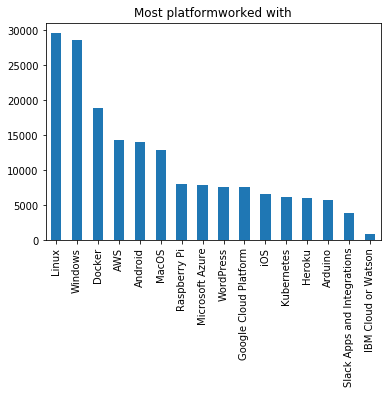

In [89]:
plot_values('PlatformWorkedWith', 'Most platformworked with')

##### Linux, Windows, Docker, AWS, Android are the top five platformes worked with

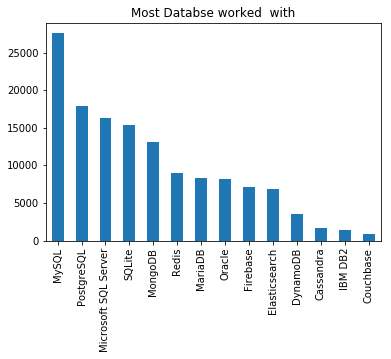

In [90]:
plot_values('DatabaseWorkedWith', 'Most Databse worked  with')

#### MySQL, PostgreSQL, Microsoft SQL Server, SQLite, MOngoDB are the top five databases worked with 

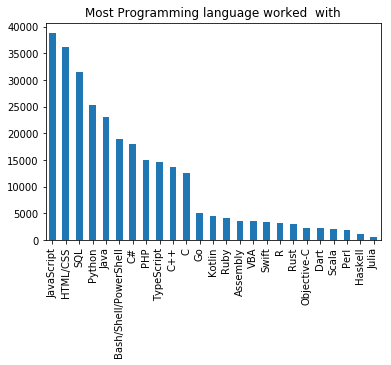

In [91]:
# finding out which programming languages are used most often by resondents
plot_values('LanguageWorkedWith', 'Most Programming language worked  with')

#### Java script is the most often used programming language

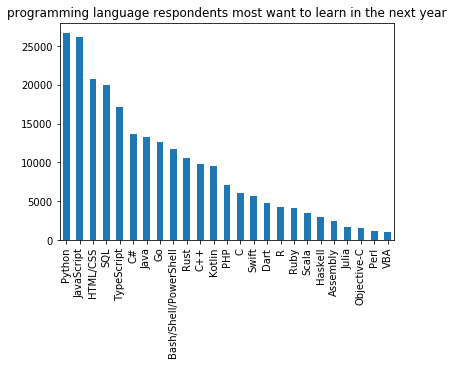

In [92]:
# finding out which programming languages are used most often by respondents
plot_values('LanguageDesireNextYear', 'programming language respondents most want to learn in the next year')

### Question 2: What are the most used framework,new collab tools and DevOps ?

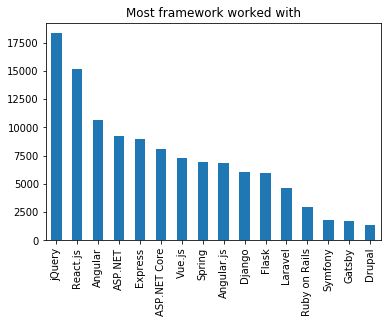

In [93]:
plot_values('WebframeWorkedWith', 'Most framework worked with')

#### jQuery, react.js, Angualr, ASP.NET, Express are the top five frameworkes worked with

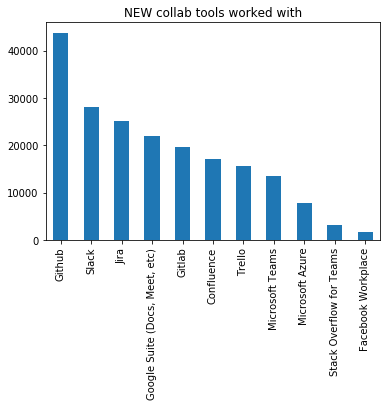

In [94]:

plot_values('NEWCollabToolsWorkedWith', 'NEW collab tools worked with')


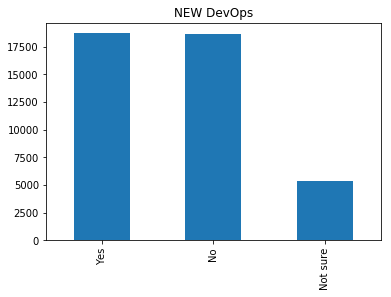

In [95]:
plot_values('NEWDevOps', 'NEW DevOps')


### Question 3: New job hunts , learn, job hunt research, overime

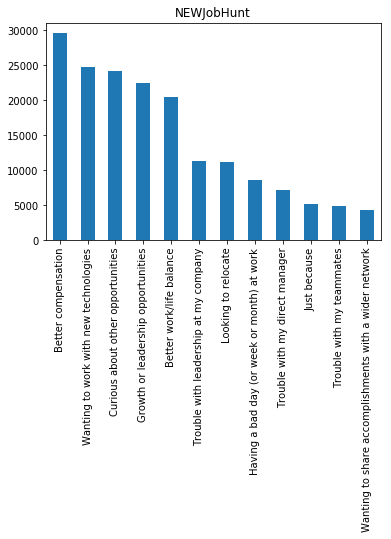

In [96]:

plot_values('NEWJobHunt', 'NEWJobHunt')

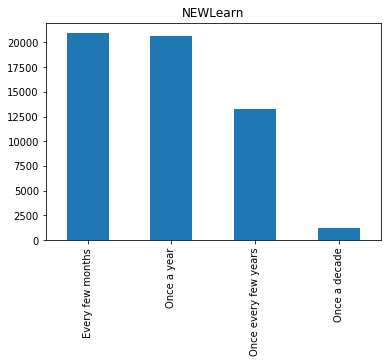

In [97]:
plot_values('NEWLearn', 'NEWLearn')

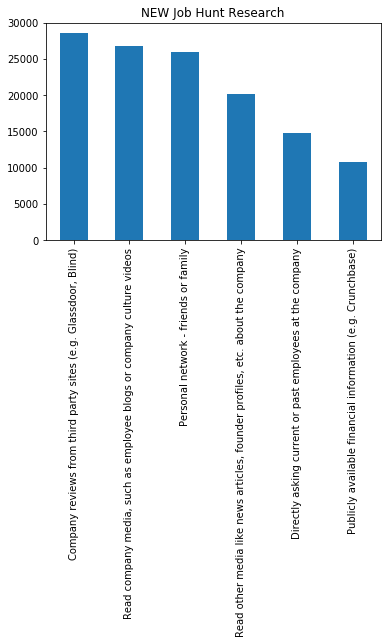

In [98]:
plot_values('NEWJobHuntResearch', 'NEW Job Hunt Research')

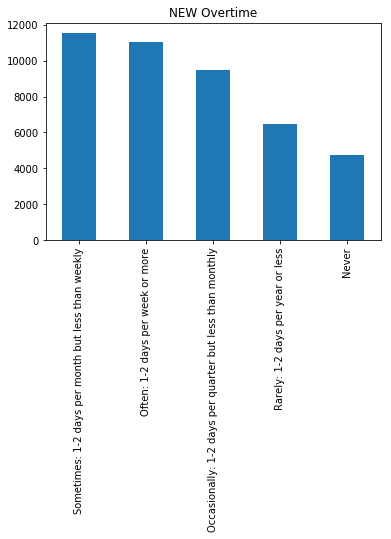

In [99]:
plot_values('NEWOvertime', 'NEW Overtime')